In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
pd.pandas.set_option('display.max_columns',None)
bol = pd.read_csv('all_season_bowling_card.csv')
bol.head(15)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,name,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,href
0,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,DL Chahar,Deepak Chahar,4.0,0,32,2,8.0,7,3,0,1,0,False,https://www.espncricinfo.com/ci/content/player...
1,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,SM Curran,Sam Curran,4.0,0,28,1,7.0,9,4,0,0,0,False,https://www.espncricinfo.com/ci/content/player...
2,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,L Ngidi,Lungi Ngidi,4.0,0,38,3,9.5,8,6,0,2,0,False,https://www.espncricinfo.com/ci/content/player...
3,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,PP Chawla,Piyush Chawla,4.0,0,21,1,5.25,11,0,1,1,0,False,https://www.espncricinfo.com/ci/content/player...
4,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,RA Jadeja,Ravindra Jadeja,4.0,0,42,2,10.5,5,2,3,0,0,False,https://www.espncricinfo.com/ci/content/player...
5,2020,1216492,MI v CSK,MI,CSK,MI,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,2,TA Boult,Trent Boult,3.2,0,23,1,6.9,12,5,0,0,0,False,https://www.espncricinfo.com/ci/content/player...
6,2020,1216492,MI v CSK,MI,CSK,MI,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,2,JL Pattinson,James Pattinson,4.0,0,27,1,6.75,10,3,0,1,0,False,https://www.espncricinfo.com/ci/content/player...
7,2020,1216492,MI v CSK,MI,CSK,MI,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,2,JJ Bumrah,Jasprit Bumrah,4.0,0,43,1,10.75,10,4,2,1,1,False,https://www.espncricinfo.com/ci/content/player...
8,2020,1216492,MI v CSK,MI,CSK,MI,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,2,KH Pandya,Krunal Pandya,4.0,0,37,1,9.25,2,1,2,1,0,False,https://www.espncricinfo.com/ci/content/player...
9,2020,1216492,MI v CSK,MI,CSK,MI,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,2,RD Chahar,Rahul Chahar,4.0,0,36,1,9.0,2,3,1,0,0,False,https://www.espncricinfo.com/ci/content/player...


In [18]:
bol.sample(2)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,name,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,href
5840,2012,548309,RR v KXIP,RR,KXIP,RR,"Sawai Mansingh Stadium, Jaipur",Jaipur,India,2,J Botha,Johan Botha,4.0,0,36,0,9.00,6,4,1,0,0,False,https://www.espncricinfo.com/ci/content/player...
3312,2016,980985,MI v KXIP,MI,KXIP,MI,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Visakhapatnam,India,2,JJ Bumrah,Jasprit Bumrah,2.0,0,13,0,6.5,3,1,0,1,0,False,https://www.espncricinfo.com/ci/content/player...


In [19]:
bol['boundaries_Conceded'] = bol['foursConceded']+bol['sixesConceded']
bol['TotalRuns_boundaries_conceded'] = (bol['foursConceded']*4)+(bol['sixesConceded']*6)
bol = bol.drop('href',axis = 1)

In [20]:
bol[((bol.fullName=='Umesh Yadav')&(bol.season == 2010))].sample(6)
bol.sample(10)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,name,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,boundaries_Conceded,TotalRuns_boundaries_conceded
9408,2008,336018,MI v CSK,MI,CSK,CSK,"Wankhede Stadium, Mumbai",Mumbai,India,2,JA Morkel,Albie Morkel,3.0,0,44,0,14.66,10,3,5,2,0,False,8,42
8317,2009,392185,RCB v CSK,RCB,CSK,RCB,"St George's Park, Port Elizabeth",Port Elizabeth,South Africa,1,DW Steyn,Dale Steyn,4.0,0,35,1,8.75,9,2,2,2,0,False,4,20
6836,2011,501211,CSK v RCB,CSK,RCB,CSK,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,2,JA Morkel,Albie Morkel,4.0,0,34,2,8.5,11,3,2,1,0,False,5,24
6837,2011,501211,CSK v RCB,CSK,RCB,CSK,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,2,TG Southee,Tim Southee,4.0,0,32,1,8.0,9,3,1,1,0,False,4,18
2265,2017,1082604,KKR v SRH,KKR,SRH,KKR,"Eden Gardens, Kolkata",Kolkata,India,2,CR Woakes,Chris Woakes,4.0,0,49,2,12.25,5,3,3,3,0,False,6,30
9358,2008,336014,DC v KKR,SRH,KKR,SRH,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Hyderabad,India,1,SB Bangar,Sanjay Bangar,1.0,0,10,0,10.0,2,2,0,0,0,False,2,8
2355,2017,1082612,KXIP v MI,KXIP,MI,KXIP,"Holkar Cricket Stadium, Indore",Indore,India,2,I Sharma,Ishant Sharma,4.0,0,58,0,14.5,4,6,4,0,0,False,10,48
2243,2017,1082603,GL v RPS,GL,RPS,GL,"Saurashtra Cricket Association Stadium, Rajkot",Rajkot,India,1,SB Jakati,Shadab Jakati,2.0,0,22,0,11.0,2,2,1,0,0,False,3,14
5903,2012,548314,DC v MI,SRH,MI,SRH,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Visakhapatnam,India,2,A Mishra,Amit Mishra,4.0,0,31,1,7.75,9,0,3,0,0,False,3,18
6854,2011,501212,DC v KXIP,SRH,KXIP,SRH,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Hyderabad,India,2,JP Duminy,Jean-Paul Duminy,2.0,0,21,0,10.5,3,0,2,2,0,False,2,12


In [21]:
# season wise bowler's dot ball %
bol.sample(2)
df = pd.pivot_table(bol[bol.fullName =='Bhuvneshwar Kumar'],index = ['season'],values= ['overs','dots','boundaries_Conceded'],aggfunc = 'sum')
df
df['Total_balls'] = df['overs'] * 6
df
df['dot_ball%'] = (df['dots']/df['Total_balls'])*100
df
df['Boundaries_ball%'] = (df['boundaries_Conceded']/df['Total_balls'])*100
df

,boundaries_Conceded,dots,overs,Total_balls,dot_ball%,Boundaries_ball%
season,,,,,,
2011,8,29,11.0,66.0,43.939394,12.121212
2012,31,94,39.0,234.0,40.170940,13.247863
2013,48,175,57.0,342.0,51.169591,14.035088
2014,50,159,52.3,313.8,50.669216,15.933716
2015,55,134,51.0,306.0,43.790850,17.973856
2016,62,169,66.0,396.0,42.676768,15.656566
2017,44,131,52.2,313.2,41.826309,14.048531
2018,46,124,46.1,276.6,44.830080,16.630513
2019,65,168,59.0,354.0,47.457627,18.361582


In [22]:
bol[((bol.fullName =='Bhuvneshwar Kumar')&(bol.season == 2014))].overs

4258    3.3
4310    4.0
4351    4.0
4408    4.0
4444    4.0
4490    4.0
4560    4.0
4579    4.0
4631    4.0
4662    3.4
4711    3.4
4739    4.0
4784    4.0
4837    2.2
Name: overs, dtype: float64

In [23]:
np.floor(bol[((bol.fullName =='Bhuvneshwar Kumar')&(bol.season == 2014))].overs)
((bol[((bol.fullName =='Bhuvneshwar Kumar')&(bol.season == 2014))].overs)- (np.floor(bol[((bol.fullName =='Bhuvneshwar Kumar')&(bol.season == 2014))].overs)))*10

4258    3.0
4310    0.0
4351    0.0
4408    0.0
4444    0.0
4490    0.0
4560    0.0
4579    0.0
4631    0.0
4662    4.0
4711    4.0
4739    0.0
4784    0.0
4837    2.0
Name: overs, dtype: float64

In [24]:
# bol['overs']
overs = np.floor(bol[((bol.fullName =='Bhuvneshwar Kumar')&(bol.season == 2014))].overs)
rem_balls = (bol[((bol.fullName =='Bhuvneshwar Kumar')&(bol.season == 2014))].overs) - overs 
tottal_balls = ((overs*6)+(rem_balls*10))
tottal_balls

4258    21.0
4310    24.0
4351    24.0
4408    24.0
4444    24.0
4490    24.0
4560    24.0
4579    24.0
4631    24.0
4662    22.0
4711    22.0
4739    24.0
4784    24.0
4837    14.0
Name: overs, dtype: float64

In [25]:
#Total_blls as feature
overs = np.floor(bol.overs)
rem_balls = (bol.overs) - overs
bol['Total_balls'] = ((overs*6)+(rem_balls*10))
bol.sample(5)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,name,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,boundaries_Conceded,TotalRuns_boundaries_conceded,Total_balls
763,2019,1175362,RCB v MI,RCB,MI,RCB,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,1,Mohammed Siraj,Mohammed Siraj,4.0,0,38,2,9.5,11,3,3,1,0,False,6,30,24.0
9642,2008,336038,DC v RR,DC,RR,RR,"Wankhede Stadium, Mumbai",Mumbai,India,2,SK Trivedi,Siddharth Trivedi,3.0,0,20,1,6.66,9,2,1,0,0,False,3,14,18.0
4003,2015,829761,KKR v DC,KKR,DC,KKR,"Eden Gardens, Kolkata",Kolkata,India,2,PP Chawla,Piyush Chawla,4.0,0,32,4,8.0,8,2,2,0,0,False,4,20,24.0
7030,2011,501228,PWI v CSK,PWI,CSK,CSK,"Dr DY Patil Sports Academy, Mumbai",Mumbai,India,1,SK Raina,Suresh Raina,3.0,0,16,0,5.33,9,2,0,0,0,False,2,8,18.0
3344,2016,980991,KXIP v SRH,KXIP,SRH,SRH,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,India,1,KV Sharma,Karn Sharma,4.0,0,26,0,6.5,7,2,0,0,0,False,2,8,24.0


# season wise bowler's dot ball %

In [26]:
# season wise bowler's dot ball %
bol.sample(2)
df = bol[((bol.season >= 2008)&(bol.season <= 2020)&(bol.fullName == 'Amit Mishra')) ]
df = pd.pivot_table(df,index = ['season'],values= ['dots','boundaries_Conceded','Total_balls','wickets','match_id'],aggfunc = ['sum','count'])
df.columns
df = df[[('sum','Total_balls'),('sum', 'boundaries_Conceded'),(  'sum',                'dots'),(  'sum',             'wickets'),('count',            'match_id')]]
df.columns = ['Total_balls','Total_boundaries','Total_dots','Total_wickets','Total_match_count']
df
df['Total_overs'] = df['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
df['dot_ball%'] = round((df['Total_dots']/df['Total_balls'])*100,2)
df['Boundaries_ball%'] = round((df['Total_boundaries']/df['Total_balls'])*100,2)
df

,Total_balls,Total_boundaries,Total_dots,Total_wickets,Total_match_count,Total_overs,dot_ball%,Boundaries_ball%
season,,,,,,,,
2008,120.0,12,44,11,6,20.0,36.67,10.00
2009,252.0,26,102,14,11,42.0,40.48,10.32
2010,318.0,42,136,17,14,53.0,42.77,13.21
2011,320.0,40,136,19,14,53.2,42.50,12.50
2012,282.0,36,93,13,14,47.0,32.98,12.77
2013,372.0,37,152,21,17,62.0,40.86,9.95
2014,225.0,38,68,7,10,37.3,30.22,16.89
2015,241.0,29,77,9,12,40.1,31.95,12.03
2016,276.0,36,96,13,14,46.0,34.78,13.04


In [27]:
df = df[['Total_match_count','Total_overs','Total_balls','Total_dots','Total_boundaries','Total_wickets','dot_ball%','Boundaries_ball%']]
df

,Total_match_count,Total_overs,Total_balls,Total_dots,Total_boundaries,Total_wickets,dot_ball%,Boundaries_ball%
season,,,,,,,,
2008,6,20.0,120.0,44,12,11,36.67,10.00
2009,11,42.0,252.0,102,26,14,40.48,10.32
2010,14,53.0,318.0,136,42,17,42.77,13.21
2011,14,53.2,320.0,136,40,19,42.50,12.50
2012,14,47.0,282.0,93,36,13,32.98,12.77
2013,17,62.0,372.0,152,37,21,40.86,9.95
2014,10,37.3,225.0,68,38,7,30.22,16.89
2015,12,40.1,241.0,77,29,9,31.95,12.03
2016,14,46.0,276.0,96,36,13,34.78,13.04


In [28]:
def bowler_stats(name,start_yr=2008,end_yr=2020):
    if name in bol.fullName.unique():
        if  ((start_yr >= min(bol.season)) & (start_yr <= max(bol.season))
             &(end_yr >= min(bol.season)) & (end_yr <= max(bol.season)) & (end_yr >= start_yr )):
            
            df = bol[((bol.season >= start_yr)&(bol.season <= end_yr)&(bol.fullName == name)) ]
            df = pd.pivot_table(df,index = ['season'],values= ['dots','boundaries_Conceded','Total_balls','wickets','match_id'],aggfunc = ['sum','count'])
            df = df[[('sum','Total_balls'),('sum','boundaries_Conceded'),('sum','dots'),('sum','wickets'),('count','match_id')]]
            df.columns = ['Total_balls','Total_boundaries','Total_dots','Total_wickets','Total_match_count']
            df['Total_overs'] = df['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
            df['dot_ball%'] = round((df['Total_dots']/df['Total_balls'])*100,2)
            df['Boundaries_ball%'] = round((df['Total_boundaries']/df['Total_balls'])*100,2)
            df = df[['Total_match_count','Total_overs','Total_balls','Total_dots','Total_boundaries','Total_wickets','dot_ball%','Boundaries_ball%']]
            plt.plot(list(df.index),df.Total_wickets, color='green', marker='o', linestyle='dashed',linewidth=1, markersize=5,label='Total Wickets')
            plt.plot(list(df.index),df.Total_match_count, color='red', marker='o', linestyle='dashed',linewidth=1, markersize=5,label='Total Matches')
            plt.legend()
            plt.show()
            return df
        else:
            print('Please enter the values correctly')
                                                                              
    else:
        print('Please search with correct bowler name and the list of bowler names who playes IPL till now is:\n ',bol.fullName.unique())
    

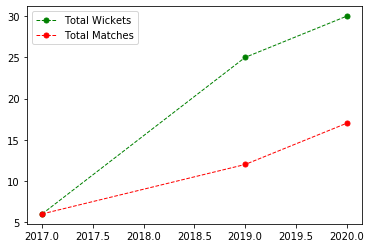

,Total_match_count,Total_overs,Total_balls,Total_dots,Total_boundaries,Total_wickets,dot_ball%,Boundaries_ball%
season,,,,,,,,
2017,6,21.2,128.0,52,25,6,40.62,19.53
2019,12,47.0,282.0,113,49,25,40.07,17.38
2020,17,65.4,394.0,156,72,30,39.59,18.27


In [29]:
bowler_stats('Kagiso Rabada',2008,2020)

In [30]:
bowler_stats('Kagiso Rabada',2020,2019)

Please enter the values correctly


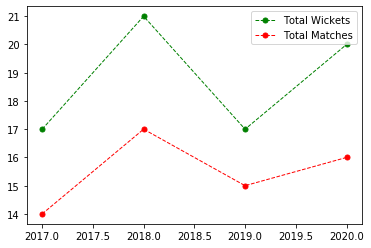

,Total_match_count,Total_overs,Total_balls,Total_dots,Total_boundaries,Total_wickets,dot_ball%,Boundaries_ball%
season,,,,,,,,
2017,14,54.0,324.0,129,37,17,39.81,11.42
2018,17,68.0,408.0,167,54,21,40.93,13.24
2019,15,60.0,360.0,166,45,17,46.11,12.50
2020,16,64.0,384.0,168,26,20,43.75,6.77


In [31]:
bowler_stats('Rashid Khan')

In [32]:
# df

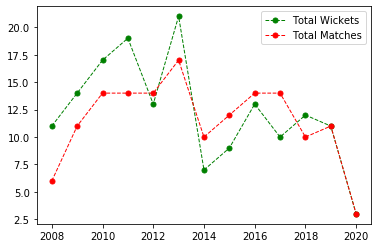

In [33]:
plt.plot(list(df.index),df.Total_wickets, color='green', marker='o', linestyle='dashed',linewidth=1, markersize=5,label='Total Wickets')
plt.plot(list(df.index),df.Total_match_count, color='red', marker='o', linestyle='dashed',linewidth=1, markersize=5,label='Total Matches')
plt.legend()
plt.show()

In [34]:
temp = bol[bol.fullName == 'Amit Mishra']
temp.sample(3)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,name,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,boundaries_Conceded,TotalRuns_boundaries_conceded,Total_balls
3541,2015,829707,CSK v DC,CSK,DC,DC,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,1,A Mishra,Amit Mishra,4.0,0,21,1,5.25,10,0,1,0,0,False,1,6,24.0
4633,2014,734001,SRH v MI,SRH,MI,SRH,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Hyderabad,India,2,A Mishra,Amit Mishra,3.0,0,33,0,11.0,3,2,2,0,0,False,4,20,18.0
6900,2011,501216,DC v SRH,DC,SRH,SRH,"Arun Jaitley Stadium, Delhi",Delhi,India,2,A Mishra,Amit Mishra,4.0,0,28,1,7.0,6,1,1,0,0,False,2,10,24.0


# purple cap holders in each season

In [35]:
# purple cap holders in each season
player_name = pd.pivot_table(index='fullName',columns='season',values='wickets',aggfunc='sum',data=bol).idxmax()
wickets = pd.pivot_table(index='fullName',columns='season',values='wickets',aggfunc='sum',data=bol).max()
df_purple = pd.concat([player_name,wickets],axis=1)
df_purple.columns = ['player_name','wickets']
df_purple

,player_name,wickets
season,,
2008,Sohail Tanvir,22.0
2009,RP Singh,23.0
2010,Pragyan Ojha,21.0
2011,Lasith Malinga,28.0
2012,Morne Morkel,25.0
2013,Dwayne Bravo,32.0
2014,Mohit Sharma,23.0
2015,Dwayne Bravo,26.0
2016,Bhuvneshwar Kumar,23.0


# best economy rate in each season vs check whether he is purple cap or not

In [36]:
# best economy rate in each season vs check whether he is purple cap or not

bol.economyRate  = bol.economyRate.replace('-','0')     #replacing the '-' to 0
bol.economyRate  = bol.economyRate.astype('float')   #converting into float


In [37]:
# player_name = pd.pivot_table(index='fullName',columns='season',values='economyRate',aggfunc='mean',data=bol).idxmin()
# economy = pd.pivot_table(index='fullName',columns='season',values='wickets',aggfunc='sum',data=bol).max()
# df_purple = pd.concat([player_name,wickets],axis=1)
# df_purple.columns = ['player_name','wickets']
# df_purple
# player_name
# economy

In [38]:
bol.sample(5)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,name,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,boundaries_Conceded,TotalRuns_boundaries_conceded,Total_balls
248,2020,1216542,SRH v KXIP,SRH,KXIP,SRH,Dubai International Cricket Stadium,Dubai,United Arab Emirates,2,KK Ahmed,Khaleel Ahmed,3.0,0,24,2,8.00,8,4,0,0,0,False,4,16,18.0
255,2020,1216500,RR v DC,RR,DC,RR,Sharjah Cricket Stadium,Sharjah,United Arab Emirates,1,Kartik Tyagi,Kartik Tyagi,4.0,0,35,1,8.75,10,1,3,1,0,False,4,22,24.0
4357,2014,729303,CSK v MI,CSK,MI,CSK,Dubai International Cricket Stadium,Dubai,United Arab Emirates,1,IC Pandey,Ishwar Pandey,4.0,0,21,0,5.25,12,3,0,0,0,False,3,12,24.0
1919,2018,1136605,DC v RCB,DC,RCB,DC,"Arun Jaitley Stadium, Delhi",Delhi,India,2,HV Patel,Harshal Patel,4.0,0,51,1,12.75,8,6,2,3,0,False,8,36,24.0
1187,2019,1178418,KKR v RR,KKR,RR,KKR,"Eden Gardens, Kolkata",Kolkata,India,2,N Rana,Nitish Rana,1.0,0,13,0,13.00,2,3,0,0,0,False,3,12,6.0


In [39]:
player_name = pd.pivot_table(index=['fullName','season'],values=['conceded','Total_balls'],aggfunc='sum',data=bol)#.idxmin()
player_name

Total_balls  conceded
fullName        season                       
Aaron Finch     2010            7.0         5
                2011           12.0        13
                2013           24.0        49
Aavishkar Salvi 2009          102.0       134
                2011           48.0        66
...                             ...       ...
Zaheer Khan     2013           36.0        47
                2014          134.0       146
                2015          145.0       156
                2016          262.0       337
                2017          241.0       313

[1438 rows x 2 columns]

In [40]:
player_name.index
temp = player_name.loc['Amit Mishra']
temp

,Total_balls,conceded
season,,
2008,120.0,138
2009,252.0,294
2010,318.0,363
2011,320.0,358
2012,282.0,377
2013,372.0,394
2014,225.0,340
2015,241.0,310
2016,276.0,344


In [41]:
temp['runRate_seasonWise'] = round((temp['conceded'] / temp['Total_balls'])*6,2)
temp

D:\Newfolder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Total_balls,conceded,runRate_seasonWise
season,,,
2008,120.0,138,6.90
2009,252.0,294,7.00
2010,318.0,363,6.85
2011,320.0,358,6.71
2012,282.0,377,8.02
2013,372.0,394,6.35
2014,225.0,340,9.07
2015,241.0,310,7.72
2016,276.0,344,7.48


In [42]:
player_name = pd.pivot_table(index=['fullName','season'],values=['conceded','Total_balls'],aggfunc='sum',data=bol)#.idxmin()
player_name['runRate_seasonWise'] = round((player_name['conceded'] / player_name['Total_balls'])*6,2)
player_name = player_name.reset_index()
player_name

,fullName,season,Total_balls,conceded,runRate_seasonWise
0,Aaron Finch,2010,7.0,5,4.29
1,Aaron Finch,2011,12.0,13,6.50
2,Aaron Finch,2013,24.0,49,12.25
3,Aavishkar Salvi,2009,102.0,134,7.88
4,Aavishkar Salvi,2011,48.0,66,8.25
...,...,...,...,...,...
1433,Zaheer Khan,2013,36.0,47,7.83
1434,Zaheer Khan,2014,134.0,146,6.54
1435,Zaheer Khan,2015,145.0,156,6.46
1436,Zaheer Khan,2016,262.0,337,7.72


In [43]:
pd.pivot_table(index='fullName',columns='season',values='runRate_seasonWise',aggfunc= 'min',data= player_name).idxmin()

season
2008    Tillakaratne Dilshan
2009     Ravichandran Ashwin
2010         Virender Sehwag
2011             Sachin Rana
2012     Lakshmipathy Balaji
2013          Adam Gilchrist
2014            Ankit Sharma
2015      Ryan ten Doeschate
2016             Nitish Rana
2017             Nathu Singh
2018               Ish Sodhi
2019             Shivam Dube
2020             Rashid Khan
dtype: object

In [44]:
player_name[((player_name['fullName'] == 'Kagiso Rabada') & (player_name.season == 2020))]

,fullName,season,Total_balls,conceded,runRate_seasonWise
615,Kagiso Rabada,2020,394.0,548,8.35


In [45]:
player_name[((player_name['fullName'] == 'Rashid Khan') & (player_name.season == 2020))]

,fullName,season,Total_balls,conceded,runRate_seasonWise
1006,Rashid Khan,2020,384.0,344,5.38


In [46]:
player_name[((player_name['fullName'] == 'Adam Gilchrist') & (player_name.season == 2013))]

,fullName,season,Total_balls,conceded,runRate_seasonWise
31,Adam Gilchrist,2013,1.0,0,0.0


In [47]:
def season_wise_bestPerformer_economyWise(season=max(bol.season),min_overs = 15):
    if ((season >= min(bol.season))&(season <= max(bol.season))):
        df = bol[bol.season == season]
        min_balls = min_overs*6
        player_name = pd.pivot_table(index=['fullName','season'],values=['conceded','Total_balls'],aggfunc='sum',data= df)#.idxmin()
        player_name['runRate_seasonWise'] = round((player_name['conceded'] / player_name['Total_balls'])*6,2)
        player_name = player_name.reset_index()
        player_name = player_name[player_name.Total_balls >= min_balls]
        player_name = player_name.sort_values(by='runRate_seasonWise',ascending = True)
        return player_name[:3].reset_index().drop('index',axis=1)
    else:
        print('Please given the season in between {} and {}'.format(min(bol.season),max(bol.season)))

In [48]:
# pd.pivot_table(index=['fullName','season'],values=['conceded','Total_balls'],aggfunc='sum',data= df).reset_index()

In [49]:
season_wise_bestPerformer_economyWise(2008,30)   #20 *6

,fullName,season,Total_balls,conceded,runRate_seasonWise
0,Sohail Tanvir,2008,247.0,266,6.46
1,Shaun Pollock,2008,276.0,301,6.54
2,Irfan Pathan,2008,318.0,350,6.60


In [50]:
season_wise_bestPerformer_economyWise(2008)   #20 *6

,fullName,season,Total_balls,conceded,runRate_seasonWise
0,Sourav Ganguly,2008,120.0,128,6.40
1,Sohail Tanvir,2008,247.0,266,6.46
2,Shaun Pollock,2008,276.0,301,6.54


In [51]:
season_wise_bestPerformer_economyWise(min_overs = 20)

,fullName,season,Total_balls,conceded,runRate_seasonWise
0,Rashid Khan,2020,384.0,344,5.38
1,Washington Sundar,2020,300.0,298,5.96
2,Axar Patel,2020,306.0,327,6.41


In [52]:
season_wise_bestPerformer_economyWise(2019)

,fullName,season,Total_balls,conceded,runRate_seasonWise
0,Rashid Khan,2019,360.0,377,6.28
1,Ravindra Jadeja,2019,324.0,343,6.35
2,Rahul Chahar,2019,282.0,308,6.55


In [53]:
# season_wise_bestPerformer_economyWise('2008')

# top 3 most runs_conceeded bowlers in each season


In [54]:
def season_wise_mostConcededRuns(season):
    if ((season >= min(bol.season))&(season <= max(bol.season))):
        df = bol[bol.season == season]
#         min_balls = 90
        player_name = pd.pivot_table(index=['fullName','season'],values=['conceded','Total_balls','wickets'],aggfunc='sum',data= df)#.idxmin()
        player_name['runRate_seasonWise'] = round((player_name['conceded'] / player_name['Total_balls'])*6,2)
        player_name = player_name.reset_index()
#         player_name = player_name[player_name.Total_balls >= min_balls]
        player_name = player_name.sort_values(by='conceded',ascending = False)
        return player_name[:3].reset_index().drop('index',axis=1)
    else:
        print('Please given the season in between {} and {}'.format(min(bol.season),max(bol.season)))

In [55]:
season_wise_mostConcededRuns(2020)

,fullName,season,Total_balls,conceded,wickets,runRate_seasonWise
0,Kagiso Rabada,2020,394.0,548,30,8.35
1,Anrich Nortje,2020,366.0,512,22,8.39
2,T Natarajan,2020,377.0,504,16,8.02


In [56]:
df = bol[bol.season == 2019]
#         min_balls = 90
player_name = pd.pivot_table(index=['fullName','season'],values=['conceded','Total_balls','wickets'],aggfunc='sum',data= df)#.idxmin()
player_name['runRate_seasonWise'] = round((player_name['conceded'] / player_name['Total_balls'])*6,2)
player_name = player_name.reset_index()
# player_name = player_name[player_name.Total_balls >= min_balls]
player_name = player_name.sort_values(by='conceded',ascending = False)
player_name[:3].reset_index().drop('index',axis=1)

,fullName,season,Total_balls,conceded,wickets,runRate_seasonWise
0,Deepak Chahar,2019,387.0,482,22,7.47
1,Mohammed Shami,2019,324.0,469,19,8.69
2,Bhuvneshwar Kumar,2019,354.0,461,13,7.81


In [57]:
# df_purple

In [58]:
bol[((bol.fullName == 'Rashid Khan')&(bol.season == 2010))].wickets.sum()

0

In [59]:
#25th Dec 2020


# best bowler for each franchise in each season

In [60]:
# best bowler : best economy rate and max wickets(desc order)
best_bowler = pd.pivot_table(bol[((bol.season == 2019)&(bol.bowling_team == 'KXIP'))],index = 'fullName',values = ['wickets','conceded','Total_balls','dots'],aggfunc ='sum')
best_bowler['Total_overs'] = best_bowler['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
best_bowler['runRate_seasonWise'] = round((best_bowler['conceded'] / best_bowler['Total_balls'])*6,2)
best_bowler = best_bowler.reset_index()
best_bowler = best_bowler.sort_values(['wickets','runRate_seasonWise','dots'],ascending = [False,True,False])
best_bowler



,fullName,Total_balls,conceded,dots,wickets,Total_overs,runRate_seasonWise
6,Mohammed Shami,324.0,469,119,19,54.0,8.69
9,Ravichandran Ashwin,330.0,400,100,15,55.0,7.27
10,Sam Curran,198.0,323,60,10,33.0,9.79
3,Hardus Viljoen,138.0,222,47,7,23.0,9.65
8,Murugan Ashwin,204.0,255,59,5,34.0,7.50
1,Ankit Rajpoot,96.0,152,35,3,16.0,9.50
7,Mujeeb Ur Rahman,114.0,191,37,3,19.0,10.05
0,Andrew Tye,132.0,233,30,3,22.0,10.59
2,Arshdeep Singh,60.0,109,20,3,10.0,10.90
12,Varun Chakravarthy,18.0,35,8,1,3.0,11.67


<Figure size 432x576 with 0 Axes>

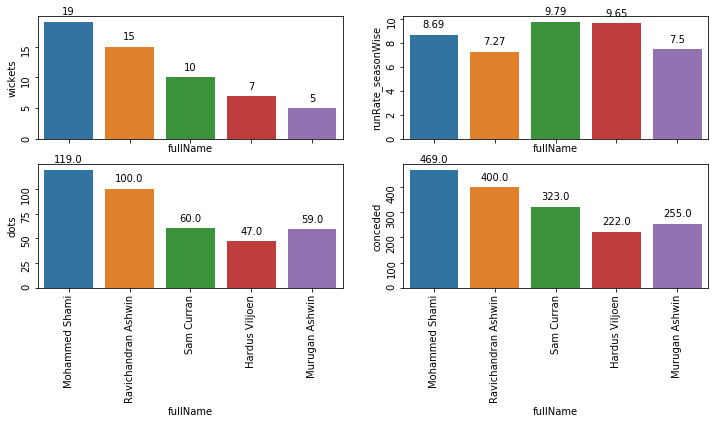

In [61]:
# fig,ax = plt.subplots(2,2,figsize = (12,5))
# sns.barplot(best_bowler[:5].fullName,best_bowler[:5].wickets,ax=ax[0][0])
# ax[0][0].tick_params(labelrotation=90)
# plt.show()

plt.figure(figsize=(6, 8))
# fig,axes = plt.subplots(5,2,sharex=True,sharey=True,figsize=fig_size)
fig,ax = plt.subplots(2,2,sharex=True,figsize = (12,5))
splot = sns.barplot(best_bowler[:5].fullName,best_bowler[:5].wickets,ax=ax[0][0])
for p in splot.patches:
    splot.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[0][0].tick_params(labelrotation=90) 

splot1 = sns.barplot(best_bowler[:5].fullName,best_bowler[:5].runRate_seasonWise,ax=ax[0][1])
for p in splot1.patches:
    splot1.annotate(float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[0][1].tick_params(labelrotation=90)

splot2 = sns.barplot(best_bowler[:5].fullName,best_bowler[:5].dots,ax=ax[1][0])
for p in splot2.patches:
    splot2.annotate(float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[1][0].tick_params(labelrotation=90)

splot3 = sns.barplot(best_bowler[:5].fullName,best_bowler[:5].conceded,ax=ax[1][1])
for p in splot3.patches:
    splot3.annotate(float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[1][1].tick_params(labelrotation=90)

plt.show()


In [62]:
# best bowler season wise for each franchise considering only wickets(max),economy rate(min),dots(max)

In [63]:
def franchise_best_bowler_visualize(bowler_df):
    plt.figure(figsize=(6, 8))
    fig,ax = plt.subplots(2,2,sharex=True,figsize = (12,5))
    splot = sns.barplot(bowler_df[:5].fullName,bowler_df[:5].wickets,ax=ax[0][0])
    for p in splot.patches:
        splot.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax[0][0].tick_params(labelrotation=90) 

    splot1 = sns.barplot(bowler_df[:5].fullName,bowler_df[:5].runRate_seasonWise,ax=ax[0][1])
    for p in splot1.patches:
        splot1.annotate(float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax[0][1].tick_params(labelrotation=90)

    splot2 = sns.barplot(bowler_df[:5].fullName,bowler_df[:5].dots,ax=ax[1][0])
    for p in splot2.patches:
        splot2.annotate(float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax[1][0].tick_params(labelrotation=90)

    splot3 = sns.barplot(bowler_df[:5].fullName,bowler_df[:5].conceded,ax=ax[1][1])
    for p in splot3.patches:
        splot3.annotate(float(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax[1][1].tick_params(labelrotation=90)

    plt.show()


In [64]:
def franchise_best_bowler(franchise_name,season = max(bol.season)):
    if ((season >= min(bol.season))&(season <= max(bol.season))):
        if franchise_name in bol.bowling_team.unique():
            best_bowler = pd.pivot_table(bol[((bol.season == season)&(bol.bowling_team == franchise_name))],index = 'fullName',values = ['wickets','conceded','Total_balls','dots'],aggfunc ='sum')
            best_bowler['Total_overs'] = best_bowler['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
            best_bowler['runRate_seasonWise'] = round((best_bowler['conceded'] / best_bowler['Total_balls'])*6,2)
            best_bowler = best_bowler.reset_index()
            best_bowler = best_bowler.sort_values(['wickets','runRate_seasonWise','dots'],ascending = [False,True,False])
#             return best_bowler[:5].reset_index().drop('index',axis=1)
            franchise_best_bowler_visualize(best_bowler[:5].reset_index().drop('index',axis=1))
            return best_bowler[:5].reset_index().drop('index',axis=1)
        else:
            print('Enter the franchise name correctly ,the available franchise names are \n',bol[bol.season == season].bowling_team.unique())
    else:
        print('Please given the season in between {} and {}'.format(min(bol.season),max(bol.season)))

<Figure size 432x576 with 0 Axes>

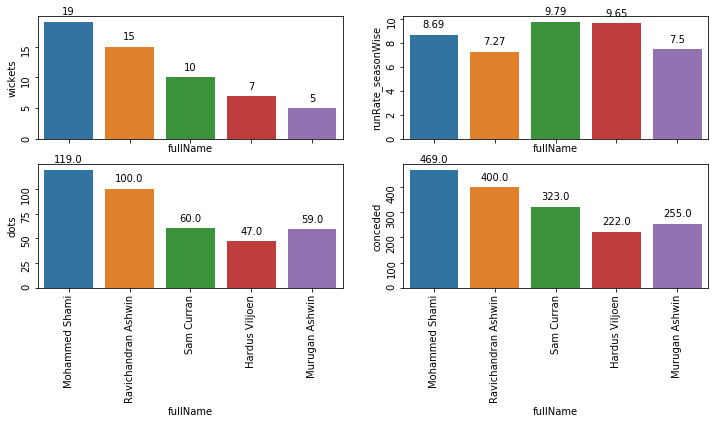

,fullName,Total_balls,conceded,dots,wickets,Total_overs,runRate_seasonWise
0,Mohammed Shami,324.0,469,119,19,54.0,8.69
1,Ravichandran Ashwin,330.0,400,100,15,55.0,7.27
2,Sam Curran,198.0,323,60,10,33.0,9.79
3,Hardus Viljoen,138.0,222,47,7,23.0,9.65
4,Murugan Ashwin,204.0,255,59,5,34.0,7.50


In [65]:
franchise_best_bowler('KXIP',2019)

In [66]:
franchise_best_bowler('KK',2008)

Enter the franchise name correctly ,the available franchise names are 
 ['RCB' 'KKR' 'KXIP' 'CSK' 'DC' 'RR' 'SRH' 'MI']


# worst bowler for each franchise in each season

In [67]:
def franchise_bowler_performance(franchise_name,performance,season = max(bol.season)):
    if ((season >= min(bol.season))&(season <= max(bol.season))):
        if franchise_name in bol.bowling_team.unique():
            best_bowler = pd.pivot_table(bol[((bol.season == season)&(bol.bowling_team == franchise_name))],index = 'fullName',values = ['wickets','conceded','Total_balls','dots'],aggfunc ='sum')
            best_bowler['Total_overs'] = best_bowler['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
            best_bowler['runRate_seasonWise'] = round((best_bowler['conceded'] / best_bowler['Total_balls'])*6,2)
            best_bowler = best_bowler.reset_index()
            if performance.lower() == 'good':
                best_bowler = best_bowler.sort_values(['wickets','runRate_seasonWise','dots'],ascending = [False,True,False])
    #             return best_bowler[:5].reset_index().drop('index',axis=1)
                franchise_best_bowler_visualize(best_bowler[:5].reset_index().drop('index',axis=1))
                return best_bowler[:5].reset_index().drop('index',axis=1)
            elif performance.lower() == 'bad':
                min_overs = 15
                badPerf_bowler = best_bowler[best_bowler.Total_overs >= min_overs]
                badPerf_bowler = badPerf_bowler.sort_values(['wickets','runRate_seasonWise','dots'],ascending = [True,False,True])
                franchise_best_bowler_visualize(badPerf_bowler[:5].reset_index().drop('index',axis=1))
                return badPerf_bowler[:5].reset_index().drop('index',axis=1)
            else:
                print('abcdef')
        else:
            print('Enter the franchise name correctly ,the available franchise names are \n',bol[bol.season == season].bowling_team.unique())
    else:
        print('Please given the season in between {} and {}'.format(min(bol.season),max(bol.season)))

<Figure size 432x576 with 0 Axes>

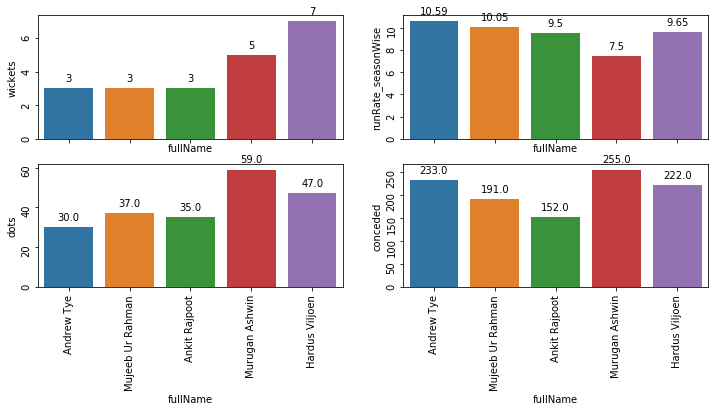

,fullName,Total_balls,conceded,dots,wickets,Total_overs,runRate_seasonWise
0,Andrew Tye,132.0,233,30,3,22.0,10.59
1,Mujeeb Ur Rahman,114.0,191,37,3,19.0,10.05
2,Ankit Rajpoot,96.0,152,35,3,16.0,9.50
3,Murugan Ashwin,204.0,255,59,5,34.0,7.50
4,Hardus Viljoen,138.0,222,47,7,23.0,9.65


In [68]:
franchise_bowler_performance('KXIP','bad',2019)

In [69]:
# franchise_bowler_performance('KXIP','good',2019)
# franchise_bowler_performance('KXIP','BAD',2019)

# best bowler for a franchise committed for last 3 seasons

In [71]:
# best bowler : best economy rate and max wickets(desc order)
best_bowler = pd.pivot_table(bol[((bol.season >= max(bol.season) -1)&(bol['bowling_team'] == 'MI'))],index = ['fullName','season'],values = ['wickets','conceded','Total_balls','dots'],aggfunc ='sum')
# best_bowler['Total_overs'] = best_bowler['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
# best_bowler['runRate_seasonWise'] = round((best_bowler['conceded'] / best_bowler['Total_balls'])*6,2)
# best_bowler = best_bowler.reset_index()
# best_bowler = best_bowler.sort_values(['wickets','runRate_seasonWise','dots'],ascending = [False,True,False])
best_bowler = best_bowler.sort_values(['fullName'],ascending = [True])
best_bowler = best_bowler.reset_index(level=1)
best_bowler

,season,Total_balls,conceded,dots,wickets
fullName,,,,,
Alzarri Joseph,2019,52.0,87,25,6
Anukul Roy,2019,12.0,11,4,1
Barinder Sran,2019,24.0,51,7,0
Ben Cutting,2019,12.0,27,2,1
Dhawal Kulkarni,2020,18.0,22,6,0
Hardik Pandya,2019,255.0,390,94,14
James Pattinson,2020,213.0,320,78,11
Jason Behrendorff,2019,114.0,165,54,5
Jasprit Bumrah,2019,370.0,409,169,19


In [72]:
# best_bowler[best_bowler.index.value_counts() == 2]

In [73]:
best_bowler = best_bowler[best_bowler.index.value_counts() == 2]
best_bowler = best_bowler.reset_index()
best_bowler

D:\Newfolder\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,fullName,season,Total_balls,conceded,dots,wickets
0,Jasprit Bumrah,2019,370.0,409,169,19
1,Jasprit Bumrah,2020,360.0,404,175,27
2,Jayant Yadav,2020,42.0,43,13,1
3,Jayant Yadav,2019,42.0,50,17,1
4,Krunal Pandya,2019,276.0,335,94,12
5,Krunal Pandya,2020,301.0,380,100,6
6,Rahul Chahar,2019,282.0,308,125,13
7,Rahul Chahar,2020,318.0,433,104,15


In [74]:
best_bowler = best_bowler.drop(['season'],axis = 1)

In [75]:

df = pd.pivot_table(best_bowler,index = 'fullName',aggfunc ='sum')
df['Total_overs'] = df['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
df['economy'] = round((df['conceded'] / df['Total_balls'])*6,2)
df = df.sort_values(['wickets','economy','dots'],ascending = [False,True,False])
df

,Total_balls,conceded,dots,wickets,Total_overs,economy
fullName,,,,,,
Jasprit Bumrah,730.0,813,344,46,121.4,6.68
Rahul Chahar,600.0,741,229,28,100.0,7.41
Krunal Pandya,577.0,715,194,18,96.1,7.44
Jayant Yadav,84.0,93,30,2,14.0,6.64


# venuw wise best bowler and worst bowler

In [76]:
stadium_name = 'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
venue_df = bol[bol['venue'] == stadium_name]
count_df  = pd.crosstab(bol.fullName,bol.venue)

df2 = count_df[count_df[stadium_name] >= 15][stadium_name].sort_values(ascending = False)

# #df2.shape[0]!= 0:
venue_best_bowlers = pd.DataFrame(index = df2.index)
wickets = []
total_balls=[]
runs_conceded = []
dots = []
for i in df2.index:
    wickets.append(bol[((bol.venue ==stadium_name )&(bol.fullName == i))].wickets.sum())
    total_balls.append(bol[((bol.venue ==stadium_name )&(bol.fullName == i))].Total_balls.sum())
    runs_conceded.append(bol[((bol.venue ==stadium_name )&(bol.fullName == i))].conceded.sum())
    dots.append(bol[((bol.venue ==stadium_name )&(bol.fullName == i))].dots.sum())
venue_best_bowlers['match_count'] = df2.values
venue_best_bowlers['runs_conceded'] = runs_conceded
venue_best_bowlers['dots'] = dots
venue_best_bowlers['wickets'] = wickets
venue_best_bowlers['Total_balls'] = total_balls
venue_best_bowlers['Total_overs'] = venue_best_bowlers['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
venue_best_bowlers['economy'] = round((venue_best_bowlers['runs_conceded'] / venue_best_bowlers['Total_balls'])*6,2)
venue_best_bowlers['avg_wicket_per_match'] = round(venue_best_bowlers['wickets'] / venue_best_bowlers['match_count'],3)
venue_best_bowlers.sort_values(by=['avg_wicket_per_match','economy'],ascending = [False,True])

,match_count,runs_conceded,dots,wickets,Total_balls,Total_overs,economy,avg_wicket_per_match
fullName,,,,,,,,
Siddarth Kaul,15,411,133,21,352.0,58.4,7.01,1.400
Rashid Khan,21,556,214,28,504.0,84.0,6.62,1.333
Dale Steyn,24,572,269,27,545.0,90.5,6.30,1.125
Amit Mishra,26,681,220,29,578.0,96.2,7.07,1.115
Bhuvneshwar Kumar,36,1056,335,36,817.0,136.1,7.76,1.000
Sandeep Sharma,16,500,136,15,365.0,60.5,8.22,0.938
Moises Henriques,21,434,115,18,341.0,56.5,7.64,0.857
Ishant Sharma,18,495,194,12,408.0,68.0,7.28,0.667
Karn Sharma,19,452,116,12,322.0,53.4,8.42,0.632


In [77]:
def venueWise_bestBowler(venue):
    venue_df = bol[bol['venue'] == venue]
    count_df  = pd.crosstab(bol.fullName,bol.venue)

    df2 = count_df[count_df[venue] >= 15][venue].sort_values(ascending = False)

    # #df2.shape[0]!= 0:
    venue_best_bowlers = pd.DataFrame(index = df2.index)
    wickets = []
    total_balls=[]
    runs_conceded = []
    dots = []
    for i in df2.index:
        wickets.append(bol[((bol.venue == venue )&(bol.fullName == i))].wickets.sum())
        total_balls.append(bol[((bol.venue == venue )&(bol.fullName == i))].Total_balls.sum())
        runs_conceded.append(bol[((bol.venue == venue )&(bol.fullName == i))].conceded.sum())
        dots.append(bol[((bol.venue == venue )&(bol.fullName == i))].dots.sum())
    venue_best_bowlers['match_count'] = df2.values
    venue_best_bowlers['runs_conceded'] = runs_conceded
    venue_best_bowlers['dots'] = dots
    venue_best_bowlers['wickets'] = wickets
    venue_best_bowlers['Total_balls'] = total_balls
    venue_best_bowlers['Total_overs'] = venue_best_bowlers['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
    venue_best_bowlers['economy'] = round((venue_best_bowlers['runs_conceded'] / venue_best_bowlers['Total_balls'])*6,2)
    venue_best_bowlers['avg_wicket_per_match'] = round(venue_best_bowlers['wickets'] / venue_best_bowlers['match_count'],3)
    return venue_best_bowlers.sort_values(by=['avg_wicket_per_match','economy'],ascending = [False,True])[:5]

In [78]:
venueWise_bestBowler('Eden Gardens, Kolkata')
# bol.sample(5)

,match_count,runs_conceded,dots,wickets,Total_balls,Total_overs,economy,avg_wicket_per_match
fullName,,,,,,,,
Sunil Narine,44,1067,441,56,1024.0,170.4,6.25,1.273
Piyush Chawla,35,956,265,41,703.0,117.1,8.16,1.171
Rajat Bhatia,20,461,114,20,384.0,64.0,7.20,1.000
Kuldeep Yadav,21,618,140,21,446.0,74.2,8.31,1.000
Shakib Al Hasan,22,627,174,21,473.0,78.5,7.95,0.955


In [79]:
stadium_name = 'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
venue_df = bol[bol['venue'] == stadium_name]
# count_df  = pd.crosstab(bol.fullName,bol.venue).idxmax()
# count_df
venue_df[venue_df.fullName == 'Amit Mishra'].match_id.count()

26

In [80]:
def venueWise_Bowler_Perf(venue,performance):
    if venue in bol.venue.unique():
        venue_df = bol[bol['venue'] == venue]
        count_df  = pd.crosstab(bol.fullName,bol.venue)

        df2 = count_df[count_df[venue] >= 15][venue].sort_values(ascending = False)

        if df2.shape[0]!= 0:
            venue_best_bowlers = pd.DataFrame(index = df2.index)
            wickets = []
            total_balls=[]
            runs_conceded = []
            dots = []
            for i in df2.index:
                wickets.append(bol[((bol.venue == venue )&(bol.fullName == i))].wickets.sum())
                total_balls.append(bol[((bol.venue == venue )&(bol.fullName == i))].Total_balls.sum())
                runs_conceded.append(bol[((bol.venue == venue )&(bol.fullName == i))].conceded.sum())
                dots.append(bol[((bol.venue == venue )&(bol.fullName == i))].dots.sum())
            venue_best_bowlers['match_count'] = df2.values
            venue_best_bowlers['runs_conceded'] = runs_conceded
            venue_best_bowlers['dots'] = dots
            venue_best_bowlers['wickets'] = wickets
            venue_best_bowlers['Total_balls'] = total_balls
            venue_best_bowlers['Total_overs'] = venue_best_bowlers['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
            venue_best_bowlers['economy'] = round((venue_best_bowlers['runs_conceded'] / venue_best_bowlers['Total_balls'])*6,2)
            venue_best_bowlers['avg_wicket_per_match'] = round(venue_best_bowlers['wickets'] / venue_best_bowlers['match_count'],3)
            if performance.lower() == 'good':
                return venue_best_bowlers.sort_values(by=['avg_wicket_per_match','economy'],ascending = [False,True])[:5]
            elif performance.lower() == 'bad':
                return venue_best_bowlers.sort_values(by=['avg_wicket_per_match','economy'],ascending = [True,False])[:5]
            else:
                print('Please enter either good/bad')
        else:
            print('No Player has played more than 15 matches in',venue,'i.e constraint breached')
    else:
        print('Please enter the venue details correctly,the available venue details where IPL matches were played till now is:\n',bol.venue.unique())

In [81]:
venueWise_Bowler_Perf('Eden Gardens, Kolkata','bad')

,match_count,runs_conceded,dots,wickets,Total_balls,Total_overs,economy,avg_wicket_per_match
fullName,,,,,,,,
Yusuf Pathan,21,353,124,12,295.0,49.1,7.18,0.571
Lakshmipathy Balaji,16,468,135,12,356.0,59.2,7.89,0.750
Umesh Yadav,22,587,194,19,438.0,73.0,8.04,0.864
Andre Russell,29,674,186,27,476.0,79.2,8.50,0.931
Shakib Al Hasan,22,627,174,21,473.0,78.5,7.95,0.955


In [82]:
venueWise_Bowler_Perf('Rajiv Gandhi International Stadium, Uppal, Hyderabad','bad')

,match_count,runs_conceded,dots,wickets,Total_balls,Total_overs,economy,avg_wicket_per_match
fullName,,,,,,,,
Karn Sharma,19,452,116,12,322.0,53.4,8.42,0.632
Ishant Sharma,18,495,194,12,408.0,68.0,7.28,0.667
Moises Henriques,21,434,115,18,341.0,56.5,7.64,0.857
Sandeep Sharma,16,500,136,15,365.0,60.5,8.22,0.938
Bhuvneshwar Kumar,36,1056,335,36,817.0,136.1,7.76,1.000


# bowler performance wrt 1st and 2nd innings 

In [84]:
def bowler_stats_InningsWise(name,innings,start_yr=2008,end_yr=2020):
    if name in bol.fullName.unique():
        if  ((start_yr >= min(bol.season)) & (start_yr <= max(bol.season))
             &(end_yr >= min(bol.season)) & (end_yr <= max(bol.season)) & (end_yr >= start_yr )):
            
            df = bol[((bol.season >= start_yr)&(bol.season <= end_yr)&(bol.fullName == name)&(bol.innings_id == innings)) ]
            df = pd.pivot_table(df,index = ['season'],values= ['dots','boundaries_Conceded','Total_balls','wickets','match_id'],aggfunc = ['sum','count'])
            df = df[[('sum','Total_balls'),('sum','boundaries_Conceded'),('sum','dots'),('sum','wickets'),('count','match_id')]]
            df.columns = ['Total_balls','Total_boundaries','Total_dots','Total_wickets','Total_match_count']
            df['Total_overs'] = df['Total_balls'].apply(lambda x: float(x//6)+float(x%6)/10)
            df['dot_ball%'] = round((df['Total_dots']/df['Total_balls'])*100,2)
            df['Boundaries_ball%'] = round((df['Total_boundaries']/df['Total_balls'])*100,2)
            df = df[['Total_match_count','Total_overs','Total_balls','Total_dots','Total_boundaries','Total_wickets','dot_ball%','Boundaries_ball%']]
            df['avg_wicket_per_season'] = round(df['Total_wickets'] / df['Total_match_count'],3)
            plt.plot(list(df.index),df.Total_wickets, color='green', marker='o', linestyle='dashed',linewidth=1, markersize=5,label='Total Wickets')
            plt.plot(list(df.index),df.Total_match_count, color='red', marker='o', linestyle='dashed',linewidth=1, markersize=5,label='Total Matches')
            plt.legend()
            plt.show()
            return df
        else:
            print('Please enter the values correctly')
                                                                              
    else:
        print('Please search with correct bowler name and the list of bowler names who playes IPL till now is:\n ',bol.fullName.unique())
    

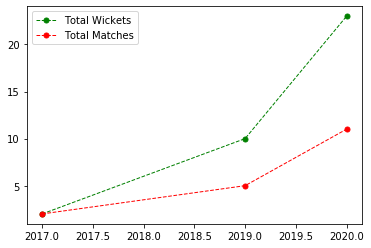

,Total_match_count,Total_overs,Total_balls,Total_dots,Total_boundaries,Total_wickets,dot_ball%,Boundaries_ball%,avg_wicket_per_season
season,,,,,,,,,
2017,2,5.2,32.0,15,6,2,46.88,18.75,1.000
2019,5,19.0,114.0,48,16,10,42.11,14.04,2.000
2020,11,41.4,250.0,101,43,23,40.40,17.20,2.091


In [85]:
bowler_stats_InningsWise('Kagiso Rabada',2,start_yr=2008,end_yr=2020)
# ,2008,2020